In [1]:
from typing import Union

import torch
from torch.optim.lr_scheduler import _LRScheduler

from typeguard import check_argument_types


class WarmupLR(_LRScheduler):
    """The WarmupLR scheduler
    This scheduler is almost same as NoamLR Scheduler except for following
    difference:
    NoamLR:
        lr = optimizer.lr * model_size ** -0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    WarmupLR:
        lr = optimizer.lr * warmup_step ** 0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    Note that the maximum lr equals to optimizer.lr in this scheduler.
    """

    def __init__(
        self,
        optimizer: torch.optim.Optimizer,
        warmup_steps: Union[int, float] = 25000,
        last_epoch: int = -1,
    ):
        assert check_argument_types()
        self.warmup_steps = warmup_steps

        # __init__() must be invoked before setting field
        # because step() is also invoked in __init__()
        super().__init__(optimizer, last_epoch)

    def __repr__(self):
        return f"{self.__class__.__name__}(warmup_steps={self.warmup_steps})"

    def get_lr(self):
        step_num = self.last_epoch + 1
        return [
            lr
            * self.warmup_steps ** 0.5
            * min(step_num ** -0.5, step_num * self.warmup_steps ** -1.5)
            for lr in self.base_lrs
        ]

    def set_step(self, step: int):
        self.last_epoch = step

In [4]:
import torch.optim as optim
model = torch.nn.Linear(10, 200)
optimizer = optim.Adam(model.parameters())
scheduler = WarmupLR(optimizer, warmup_steps=25000)

In [5]:
infos = {}
start_epoch = infos.get('epoch', -1) + 1
cv_loss = infos.get('cv_loss', 0.0)
step = infos.get('step', -1)
print(start_epoch, cv_loss, step)

0 0.0 -1


In [9]:
scheduler.set_step(step)

In [10]:
lrs=[]
for i in range(100000):
    scheduler.step()
    lrs.append(scheduler.get_lr())

In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

     |████████████████████████████████| 10.3 MB 575 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 465 kB/s eta 0:00:01


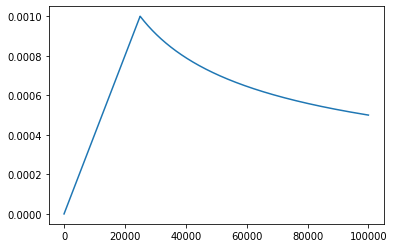

In [15]:
xs = list(range(100000))
plt.plot(xs, lrs)

In [17]:
from typing import Union

from paddle.optimizer.lr import LRScheduler
from typeguard import check_argument_types

class WarmupLR(LRScheduler):
    """The WarmupLR scheduler
    This scheduler is almost same as NoamLR Scheduler except for following
    difference:
    NoamLR:
        lr = optimizer.lr * model_size ** -0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    WarmupLR:
        lr = optimizer.lr * warmup_step ** 0.5
             * min(step ** -0.5, step * warmup_step ** -1.5)
    Note that the maximum lr equals to optimizer.lr in this scheduler.
    """

    def __init__(self,
                 warmup_steps: Union[int, float]=25000,
                 learning_rate=1.0,
                 last_epoch=-1,
                 verbose=False):
        assert check_argument_types()
        self.warmup_steps = warmup_steps
        super().__init__(learning_rate, last_epoch, verbose)

    def __repr__(self):
        return f"{self.__class__.__name__}(warmup_steps={self.warmup_steps})"

    def get_lr(self):
        step_num = self.last_epoch + 1
        return self.base_lr * self.warmup_steps**0.5 * min(
            step_num**-0.5, step_num * self.warmup_steps**-1.5)

    def set_step(self, step: int):
        self.step(step)

/workspace/wenet/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
sc = WarmupLR(warmup_steps=25000, learning_rate=0.001)
print(step)
#sc.set_step(step)
sc.set_step(0)

-1


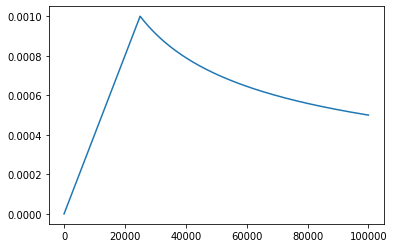

In [23]:
lrs=[]
for i in range(100000):
    sc.step()
    lrs.append(sc.get_lr())
xs = list(range(100000))
plt.plot(xs, lrs)